In [1]:
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix
#!jupyter serverextension enable voila --sys-prefix

In [3]:
#load the data sets
trainingDF = pd.read_csv('2018_2021_cleaned.csv')
gameDF = pd.read_csv('2022_cleaned_1-7.csv')

In [4]:
#picking our features to train our model with
features = trainingDF.copy()
features = features.drop(["Week","Date","Tm_x","Tm_score","away_score",
                   "away","won","Tm_y","result","W_x","L_x","T_x","W_y","L_y","T_y","W-L%_x","W-L%_y"], axis=1)

In [5]:

scaler = StandardScaler()
# fit the transformer to the features
scaler.fit(features)

# transform and save as X
X = scaler.transform(features)
y = trainingDF['result']
# create train-test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [6]:
# create the classifier
lrc = LogisticRegression()

# fit classifier to the training data
lrc.fit(X_train, y_train)

LogisticRegression()

In [7]:
# predict with the classifier using the .predict() function
y_pred = lrc.predict(X_test)

# view the model accuracy with the accuracy_score() function
# accuracy_score(y_test, y_pred)


In [8]:
def nfl_prediction(week):
    df = pd.read_csv('2022_cleaned_1-7.csv')
    weekDF = df.loc[df['Week'] == week]
    features = weekDF.drop(["Week","Date","Tm_x","Tm_score","away_score",
                   "away","won","Tm_y","result","W_x","L_x","T_x","W_y","L_y","T_y","W-L%_x","W-L%_y"], axis=1)
    scaler = StandardScaler()
    # fit the transformer to the features
    scaler.fit(features)

    # transform and save as X
    gamespredicted = scaler.transform(features)
    result = lrc.predict(gamespredicted)
    
    col_names = ['Week', 'Date', 'Tm_y', 'away_score','Tm_score','Tm_x','result']
    game_data = weekDF.loc[:,col_names]
    
    game_data.rename(columns = {'Tm_y':'Away Team', 'Tm_x':'Home Team'}, inplace = True)
    game_data = game_data.assign(predicted = result)
    game_data['Winner Prediction'] = np.where(game_data['result'] == 1, game_data['Home Team'],game_data['Away Team'])
    # create comparison table
    current_game_table = game_data[['Away Team','Home Team','Winner Prediction']]
    return current_game_table

In [9]:
label_header = widgets.HTML(value="NFL Game Predictions")

label_description = widgets.HTML(value="select a week to predict")

display(label_header)

display(label_description)

choose_week = widgets.Dropdown(
    options=[1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18],
    value= 1,
    description='Week: ',
    disabled=False,
)

display(choose_week)
output = widgets.Output()
display(output)

@output.capture()
def dropdown_eventhandler(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        df = nfl_prediction(change['new'])
        print(df)


choose_week.observe(dropdown_eventhandler, names='value')

HTML(value='NFL Game Predictions')

HTML(value='select a week to predict')

Dropdown(description='Week: ', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18), value=…

Output()

In [10]:
# name

name = widgets.Text(placeholder='Your name here')

In [11]:
date = widgets.DatePicker(description='Pick a Date')

In [12]:
# number of friends

friends = widgets.IntSlider(
            value=3, # default value
            min=0, 
            max=10,
            step=1,
            style={'description_width': 'initial', 'handle_color': '#16a085'} 
        )

In [13]:
# button send

button_send = widgets.Button(
                description='Send to grandma',
                tooltip='Send',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()
        print("Sent message: ")
        print(f"Dear Grandma! This is your favourite {grand.value}, {name.value}.")
        print(f"I would love to come over on {date.value} for dinner, if that's okay for you!")
        print(f"Also, if you don't mind, I'll bring along {friends.value} hungry ghosts for your delicious food!")

button_send.on_click(on_button_clicked)

vbox_result = widgets.VBox([button_send, output])

In [14]:
text_0 = widgets.HTML(value="<h1>NFL Prediction Model</h1>")
text_1 = widgets.HTML(value="<h2>Select the Week you would like to predict</h2>")
text_2= widgets.HTML(value="<h2>I would love to come over on </h2>")
text_3= widgets.HTML(value="<h2>for dinner, if that's okay for you!</h2>")
text_4= widgets.HTML(value="<h2>Also, if you don't mind, I'll bring along </h2>")
text_5= widgets.HTML(value="<h2>hungry ghosts for dinner, if that's okay for you!</h2>")

# vbox_text = widgets.VBox([text_0, text_1, choose_week])

In [15]:
# page = widgets.HBox([vbox_text])

HTML(value='Team SRS score')

HTML(value='The graph below contains the top 10 directors based on their best movie gross earnings. ')

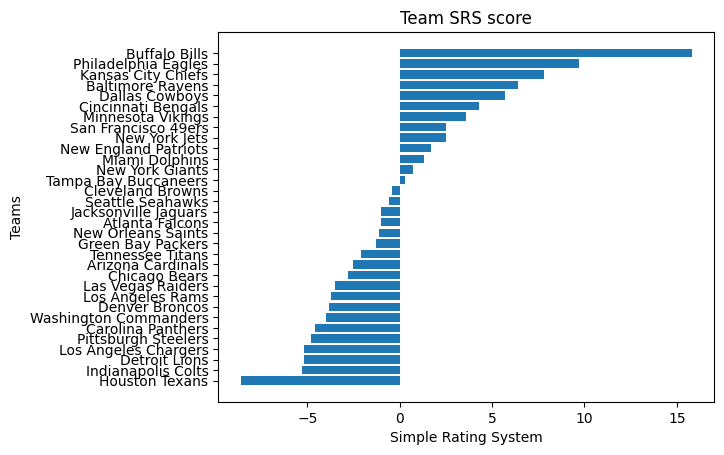

In [16]:
label_headline3 = widgets.HTML(value="Team SRS score")
label_explaination3 = widgets.HTML(value="The graph below contains the top 10 directors based on their best movie gross earnings. ")

display(label_headline3)
display(label_explaination3)
df = pd.read_csv('2022_stats_week9.csv')
df = df.sort_values(by=['SRS'])
plt.barh(df['Tm'],df['SRS'],)
plt.xlabel("Simple Rating System")
plt.ylabel("Teams")
plt.title('Team SRS score')
plt.show()

HTML(value='Team SRS score')

HTML(value='The graph below contains the top 10 directors based on their best movie gross earnings. ')

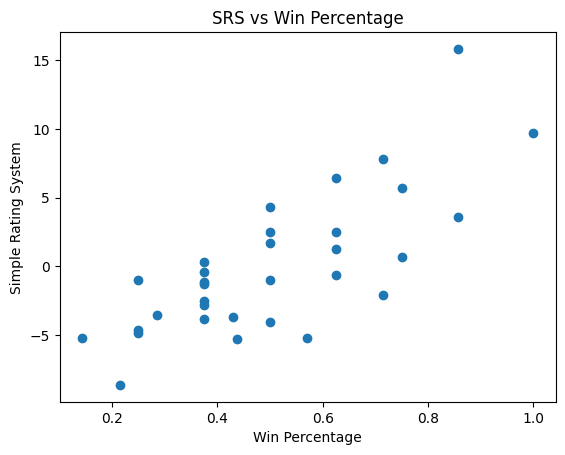

In [30]:
label_headline3 = widgets.HTML(value="Team SRS score")
label_explaination3 = widgets.HTML(value="The graph below contains the top 10 directors based on their best movie gross earnings. ")

display(label_headline3)
display(label_explaination3)
df = pd.read_csv('2022_stats_week9.csv')
df = df.sort_values(by=['SRS'])
plt.scatter(df['W-L%'],df['SRS'],)
plt.xlabel("Win Percentage")
plt.ylabel("Simple Rating System")
plt.title('SRS vs Win Percentage')
plt.show()

HTML(value='Home vs Away Wins')

HTML(value='The graph below contains the top 10 directors based on their best movie gross earnings. ')

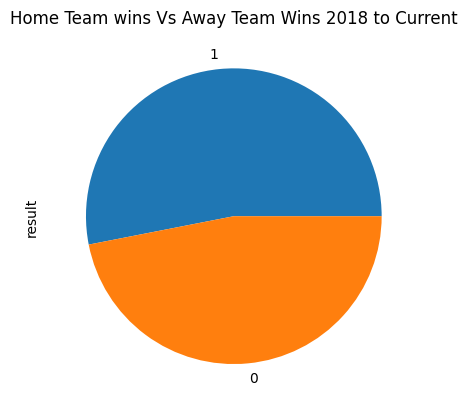

In [23]:
label_headline3 = widgets.HTML(value="Home vs Away Wins")
label_explaination3 = widgets.HTML(value="The graph below contains the top 10 directors based on their best movie gross earnings. ")

display(label_headline3)
display(label_explaination3)
df2 = pd.read_csv('2018_2021_cleaned.csv')
ax = df2['result'].value_counts().plot(kind='pie')
ax.set_title('Home Team wins Vs Away Team Wins 2018 to Current');
# plt.barh(df['Tm'],df['SRS'],)
# plt.xlabel("Simple Rating System")
# plt.ylabel("Teams")
# plt.title('Team SRS score')
# plt.show()

HTML(value='Home vs Away Wins')

HTML(value='The graph below contains the top 10 directors based on their best movie gross earnings. ')

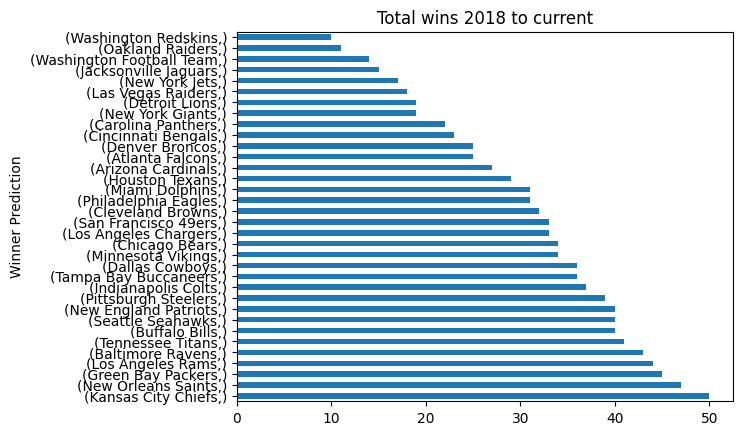

In [22]:
label_headline3 = widgets.HTML(value="Home vs Away Wins")
label_explaination3 = widgets.HTML(value="The graph below contains the top 10 directors based on their best movie gross earnings. ")

display(label_headline3)
display(label_explaination3)

game_data = pd.DataFrame()
game_data['Winner Prediction'] = np.where(df2['result'] == 1, df2['Tm_x'],df2['away'])
ax = game_data.value_counts().plot(kind='barh')
ax.set_title('Total wins 2018 to current');


In [ ]:
# choose_week = widgets.Dropdown(
#     options=df['Tm'],
#     value= None,
#     description='Team: ',
#     disabled=False,
# )

# display(choose_week)
# output = widgets.Output()
# display(output)

# @output.capture()
# def dropdown_eventhandler(change):
#     if change['name'] == 'value' and (change['new'] != change['old']):
#         clear_output()
#         test = df.loc[df['Tm'] == change['new']]
#         rating = test[['SRS','OSRS','DSRS']]
#         rating = rating.T
#         rating.plot(kind='barh')
#         plt.bar(rating)
#         plt.xlabel("Teams")
#         plt.ylabel("SRS Score")
#         plt.title(change['new'])
#         plt.show()
        


# choose_week.observe(dropdown_eventhandler, names='value')